<a href="https://colab.research.google.com/github/Anuj123verma/Computer-Vision/blob/main/Lecture_3_HW_2017026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
from os import walk
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from scipy import stats



In [ ]:
def get_background(frames, type, path):
  red_channel=[]
  green_channel=[]
  blue_channel=[]
  frame=[]
  for f in frames:
    img = cv2.imread(path+f)
    # plt.imshow(img)
    img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    red = img1[:,:,0]
    green = img1[:,:,1]
    blue = img1[:,:,2]
    red_channel.append(red)
    green_channel.append(green)
    blue_channel.append(blue)
    frame.append(img1)

  red_channel = np.array(red_channel)
  green_channel = np.array(green_channel)
  blue_channel = np.array(blue_channel)
  merge_channel=0
  if(type=="median"):
    median_red = np.median(red_channel,axis=0)
    median_green = np.median(green_channel,axis=0)
    median_blue = np.median(blue_channel,axis=0)
    merge_channel = cv2.merge((median_red,median_green,median_blue))
  
  elif(type=="mean"):
    mean_red = np.array(np.median(red_channel,axis=0),dtype='int')
    mean_green = np.array(np.median(green_channel,axis=0),dtype='int')
    mean_blue = np.array(np.median(blue_channel,axis=0),dtype='int')
    merge_channel = cv2.merge((mean_red,mean_green,mean_blue))
  else:
    mode_red = np.array(stats.mode(red_channel,axis=0),dtype='int')
    mode_green = np.array(stats.mode(green_channel,axis=0),dtype='int')
    mode_blue = np.array(stats.mode(blue_channel,axis=0),dtype='int')
    merge_channel = cv2.merge((mode_red[0,0,:,:],mode_green[0,0,:,:],mode_blue[0,0,:,:]))

  return merge_channel,frame

In [ ]:
def get_foreground(frames, bg):
  fg=[]
  for f in frames:
    res_img = np.abs(np.subtract(f,background))
    img = np.array(res_img,dtype=np.uint8)
    img1 = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    ret,thresh = cv2.threshold(img1,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    fg.append(thresh)
  return fg

In [ ]:
def save_img(dir,images):
  idx=0
  for m in images:
    file_name= dir+str(idx)+".jpg"
    try:
      cv2.imwrite(file_name,cv2.resize(m,(180,144)))
      idx+=1
    except Exceptions as e:
      pass

In [ ]:
def process_video(filename,path):
  video = cv2.VideoCapture(filename)
  idx=0
  true=1
  while true:
    true,img = video.read()
    file_name = path+str(idx)+".jpg"
    try:
      cv2.imwrite(file_name,cv2.resize(img,(180,144)))
      idx+=1
    except Exception as e:
      pass


In [ ]:
def frame_dir_path(path):
  frame= os.listdir(path)
  return sorted(frame)


In [ ]:
!mkdir video_frames_dynamic

In [ ]:
path = "/content/video_frames_dynamic/frame_"
filename = "/content/dynamic.mp4"
process_video(filename,path)

In [ ]:
path="/content/video_frames_dynamic/"
frames = frame_dir_path(path)
print(frames)
path="/content/video_frames_dynamic/"
background,frames = get_background(frames,"mean",path)

['frame_0.jpg', 'frame_1.jpg', 'frame_10.jpg', 'frame_100.jpg', 'frame_101.jpg', 'frame_102.jpg', 'frame_103.jpg', 'frame_104.jpg', 'frame_105.jpg', 'frame_106.jpg', 'frame_107.jpg', 'frame_108.jpg', 'frame_109.jpg', 'frame_11.jpg', 'frame_110.jpg', 'frame_111.jpg', 'frame_112.jpg', 'frame_113.jpg', 'frame_114.jpg', 'frame_115.jpg', 'frame_116.jpg', 'frame_117.jpg', 'frame_118.jpg', 'frame_119.jpg', 'frame_12.jpg', 'frame_120.jpg', 'frame_121.jpg', 'frame_122.jpg', 'frame_123.jpg', 'frame_124.jpg', 'frame_125.jpg', 'frame_126.jpg', 'frame_127.jpg', 'frame_128.jpg', 'frame_129.jpg', 'frame_13.jpg', 'frame_130.jpg', 'frame_131.jpg', 'frame_132.jpg', 'frame_133.jpg', 'frame_134.jpg', 'frame_135.jpg', 'frame_136.jpg', 'frame_137.jpg', 'frame_138.jpg', 'frame_139.jpg', 'frame_14.jpg', 'frame_140.jpg', 'frame_141.jpg', 'frame_142.jpg', 'frame_143.jpg', 'frame_144.jpg', 'frame_145.jpg', 'frame_146.jpg', 'frame_147.jpg', 'frame_148.jpg', 'frame_149.jpg', 'frame_15.jpg', 'frame_150.jpg', 'frame

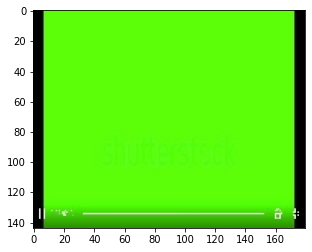

In [ ]:
plt.imshow(background)
plt.show()

In [ ]:
!mkdir foregroud_background_mean

In [ ]:
path="/content/video_frames_dynamic/"
frames = frame_dir_path(path)
background,frames = get_background(frames,"mean",path)
foreground = get_foreground(frames,background)
save_img("contents/foregroud_background_mean",foreground)

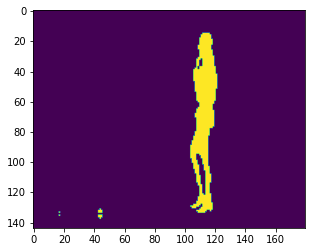

In [ ]:
plt.imshow(foreground[0])

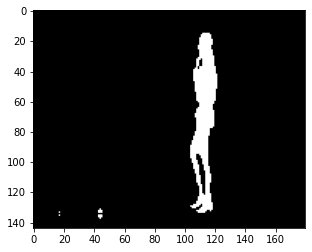

In [ ]:
plt.imshow(foreground[0],cmap='gray')

In [ ]:
!mkdir foregroud_background_median

In [ ]:
path="/content/video_frames_dynamic/"
frames = frame_dir_path(path)
background,frames = get_background(frames,"median",path)
foreground = get_foreground(frames,background)
save_img("contents/foregroud_background_median",foreground)

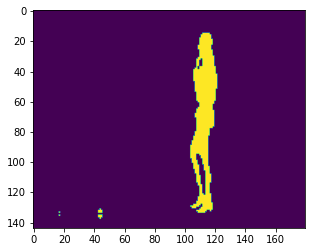

In [ ]:
plt.imshow(foreground[0])

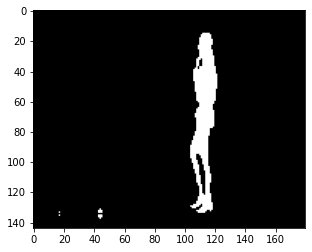

In [ ]:
plt.imshow(foreground[0],cmap='gray')

In [ ]:
!mkdir foregroud_background_mode

In [ ]:
path="/content/video_frames_dynamic/"
frames = frame_dir_path(path)
background,frames = get_background(frames,"mode",path)
foreground = get_foreground(frames,background)
save_img("contents/foregroud_background_mode",foreground)

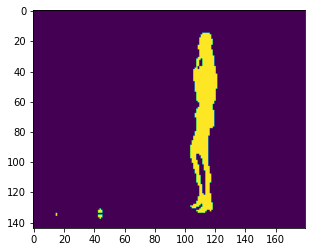

In [ ]:
plt.imshow(foreground[0])

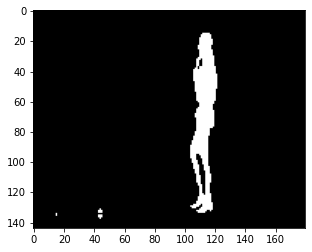

In [ ]:
plt.imshow(foreground[0],cmap='gray')

#**Now Doing Same Things On Static Video**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!mkdir video_frames_static

In [ ]:
path = "/content/video_frames_static/frame_"
filename = "/content/static.mp4"
process_video(filename,path)

In [ ]:
path="/content/video_frames_static/"
frames = frame_dir_path(path)
print(frames)
path="/content/video_frames_static/"
background,frames = get_background(frames,"mean",path)

['frame_0.jpg', 'frame_1.jpg', 'frame_10.jpg', 'frame_100.jpg', 'frame_101.jpg', 'frame_102.jpg', 'frame_103.jpg', 'frame_104.jpg', 'frame_105.jpg', 'frame_106.jpg', 'frame_107.jpg', 'frame_108.jpg', 'frame_109.jpg', 'frame_11.jpg', 'frame_110.jpg', 'frame_111.jpg', 'frame_112.jpg', 'frame_113.jpg', 'frame_114.jpg', 'frame_115.jpg', 'frame_116.jpg', 'frame_117.jpg', 'frame_118.jpg', 'frame_119.jpg', 'frame_12.jpg', 'frame_120.jpg', 'frame_121.jpg', 'frame_122.jpg', 'frame_123.jpg', 'frame_124.jpg', 'frame_125.jpg', 'frame_126.jpg', 'frame_127.jpg', 'frame_128.jpg', 'frame_129.jpg', 'frame_13.jpg', 'frame_130.jpg', 'frame_131.jpg', 'frame_132.jpg', 'frame_133.jpg', 'frame_134.jpg', 'frame_135.jpg', 'frame_136.jpg', 'frame_137.jpg', 'frame_138.jpg', 'frame_139.jpg', 'frame_14.jpg', 'frame_140.jpg', 'frame_141.jpg', 'frame_142.jpg', 'frame_143.jpg', 'frame_144.jpg', 'frame_145.jpg', 'frame_146.jpg', 'frame_147.jpg', 'frame_148.jpg', 'frame_149.jpg', 'frame_15.jpg', 'frame_150.jpg', 'frame

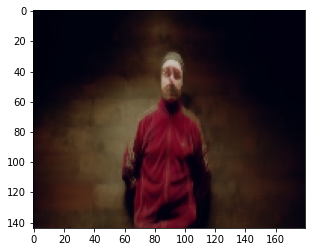

In [ ]:
plt.imshow(background)
plt.show()

In [ ]:
!mkdir foregroud_background_static_mean

In [ ]:
path="/content/video_frames_static/"
frames = frame_dir_path(path)
background,frames = get_background(frames,"mean",path)
foreground = get_foreground(frames,background)
save_img("contents/foregroud_background_static_mean",foreground)

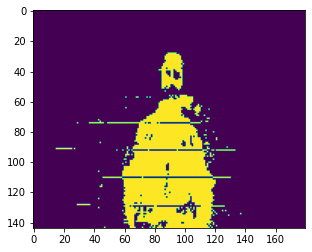

In [ ]:
plt.imshow(foreground[0])

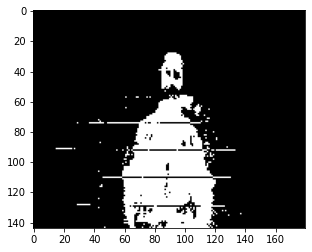

In [ ]:
plt.imshow(foreground[0],cmap='gray')

In [ ]:
!mkdir foregroud_background_static_median

In [ ]:
path="/content/video_frames_static/"
frames = frame_dir_path(path)
background,frames = get_background(frames,"median",path)
foreground = get_foreground(frames,background)
save_img("contents/foregroud_background_static_median",foreground)

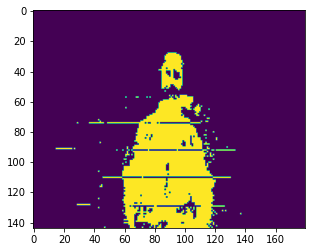

In [ ]:
plt.imshow(foreground[0])

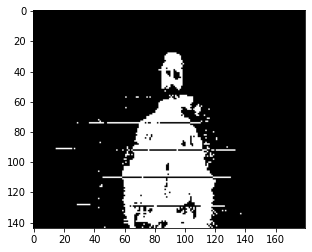

In [ ]:
plt.imshow(foreground[0],cmap='gray')

In [ ]:
!mkdir foregroud_background_static_mode

In [ ]:
path="/content/video_frames_static/"
frames = frame_dir_path(path)
background,frames = get_background(frames,"mode",path)
foreground = get_foreground(frames,background)
save_img("contents/foregroud_background_static_mode",foreground)

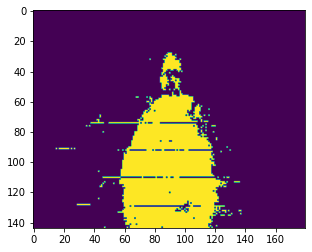

In [ ]:

plt.imshow(foreground[0])

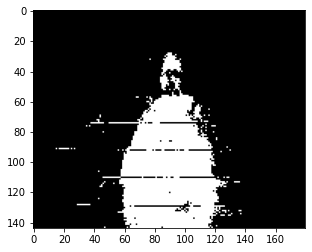

In [ ]:
plt.imshow(foreground[0],cmap='gray')